In [1]:
import json
from datasets import load_dataset

ds = load_dataset("deepmind/code_contests", split="train")

print(ds)

/Users/royhuang/anaconda3/envs/rllm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['name', 'description', 'public_tests', 'private_tests', 'generated_tests', 'source', 'difficulty', 'solutions', 'incorrect_solutions', 'cf_contest_id', 'cf_index', 'cf_points', 'cf_rating', 'cf_tags', 'is_description_translated', 'untranslated_description', 'time_limit', 'memory_limit_bytes', 'input_file', 'output_file'],
    num_rows: 13328
})


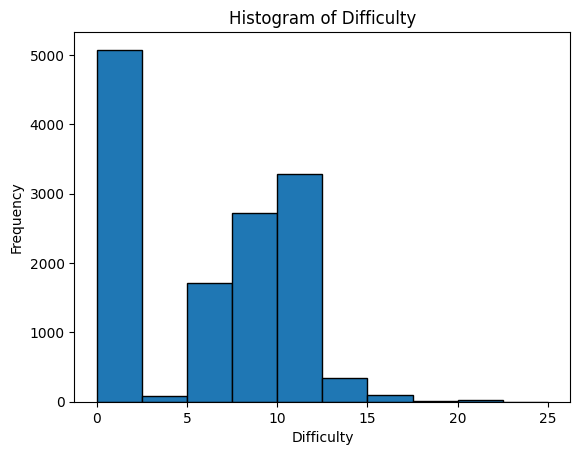

In [2]:
import matplotlib.pyplot as plt

# Extract the difficulty values
difficulties = [entry['difficulty'] for entry in ds]

# Plot the histogram
plt.hist(difficulties, bins=10, edgecolor='black')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.title('Histogram of Difficulty')
plt.show()

In [4]:
dataset = []
for entry in ds:
    difficulty = entry["difficulty"] # TODO: understand how the difficulty is calculated and convert the difficulty to a number from 1-10 or 0 for unknown        
    new_entry = {
        "problem": entry["description"],
        "input_file": entry["input_file"],
        "output_file": entry["output_file"],
        "solutions": entry["solutions"],
        "incorrect_solutions": entry["incorrect_solutions"],
        "private_tests": entry["private_tests"],
        "generated_tests": entry["generated_tests"],
        "time_limit": entry["time_limit"],
        "public_tests": entry["public_tests"],#str, when use it as a reward, need use json.loads
        "memory_limit_bytes": entry["memory_limit_bytes"],
        "difficulty": difficulty,
    }
    if difficulty >= 5:
        dataset.append(new_entry)

print(len(dataset))

with open("train_code_contests.json", "w") as f:
    json.dump(dataset, f, indent=4)

8177


In [5]:
ds = load_dataset("deepmind/code_contests", split="test")


dataset = []
for entry in ds:
    difficulty = entry["difficulty"] # TODO: understand how the difficulty is calculated and convert the difficulty to a number from 1-10 or 0 for unknown
    new_entry = {
        "problem": entry["description"],
        "input_file": entry["input_file"],
        "output_file": entry["output_file"],
        "solutions": entry["solutions"],
        "incorrect_solutions": entry["incorrect_solutions"],
        "private_tests": entry["private_tests"],
        "generated_tests": entry["generated_tests"],
        "time_limit": entry["time_limit"],
        "public_tests": entry["public_tests"],#str, when use it as a reward, need use json.loads
        "memory_limit_bytes": entry["memory_limit_bytes"],
        "difficulty": difficulty,
    }
    dataset.append(new_entry)

print(len(dataset))

with open("test_code_contests.json", "w") as f:
    json.dump(dataset, f, indent=4)

165
